The task will be to try the variational Bayesian Learning on a small test problem.

• Measurements: x 2 R

• Class y 2 {0, 1}

• Model: p(y | x)=1/(1 + exp((wx + b))) – logistic model with 1D input

• Parameters: theta = (w, b)

In [131]:
import numpy as np
from math import exp, log, pi
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [132]:
def prediction(x, theta):
    """ model posterior probability p(y=0 | x; theta) """
    w = theta[0]
    b = theta[1]
    return  np.array([1/(1 + exp(-(w*xi + b))) for xi in x])



In [133]:
def log_likelihood(py, y):
    """ log likelihood of a given prediction at ground truth y"""
    r = np.log(py[y == 0]).sum()
    r += np.log(1 - py[y == 1]).sum()
    return r 

In [134]:
def error_rate(y_pred, y_true):
    return round(np.sum(y_pred != y_true)/ len(y_pred) , 4)

In [135]:
def prob_to_label(y_pred):
    return [(yi < 0.5) for yi in y_pred]

In [136]:
def create_dataset(N):
    mean_0_class = -2
    mean_1_class = 2
    sigma_0_class = 1
    sigma_1_class = 2

    class_0 = np.random.normal(mean_0_class, sigma_0_class, int(N/2))
    class_1 = np.random.normal(mean_1_class, sigma_1_class, N - int(N/2))

    x = np.concatenate([class_0, class_1])
    y = np.array([0]*int(N/2) + [1]*( N - int(N/2)))
    
    return x, y, class_0, class_1 
    

In [137]:
def optimize_theta(x, y):
   
    nll = lambda theta: -log_likelihood(prediction(x, theta), y)
    theta0 = np.ones([2])
    o = minimize(nll, theta0, method='Nelder-Mead') 
    
    opt_theta = o.x
    return opt_theta

In [138]:
def optimize_eta(x, y):
    w_prior_mu = 0
    w_prior_var = 10**6
    b_prior_mu = 0
    b_prior_var = 10**8
    x = np.array(x)
    vb = lambda eta: -log_likelihood(expected_prediction(x, eta), y) +  \
                    kl_div(w_prior_mu, eta[0], w_prior_var, variance_parametrization(eta[2])) + \
                    kl_div(b_prior_mu, eta[1], b_prior_var, variance_parametrization(eta[3]))
    eta0 = np.ones([4])
    o = minimize(vb, eta0, method='Nelder-Mead') 
    
    opt_eta = o.x
    return opt_eta

In [139]:
def variance_parametrization(z):
    if z < 0:
        return exp(z)
    else:
        return z + 1

In [140]:
def expected_prediction(x: np.array, eta) -> np.array:
    """ compute expectation of prediction p(y=0| x; theta) over theta ~ q"""
    mu_w, mu_b, z_w, z_b = eta
    var_w = variance_parametrization(z_w)
    var_b = variance_parametrization(z_b)
    v_0 = pi ** 2 / 3
    m = mu_w * x + mu_b
    v = var_w * x**2 + var_b
    a = m/np.sqrt(v/v_0 + 1)
    py = 1 / (1 + np.exp(-a))
    return py

In [141]:
def kl_div(mu_1, mu_2, var_1, var_2):
    """ KL divergence of two Gaussian variables """
    return 1/2*(log(var_2) - log(var_1) + (var_1 + (mu_1 - mu_2)**2)/var_2 - 1)

In [180]:
x_sligtly_not_separable2 = x
y_sligtly_not_separable2 = y

In [172]:
x_sligtly_not_separable = x
y_sligtly_not_separable = y

In [167]:
x_separable = x
y_separable = y

In [204]:
x = x_separable
y = y_separable

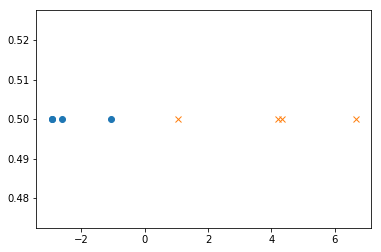

In [218]:
N = 8
x, y, class_0, class_1 = create_dataset(N)

plt.plot(class_0, len(class_0)*[0.5], "o")
plt.plot(class_1, len(class_1)*[0.5], "x")
plt.show()

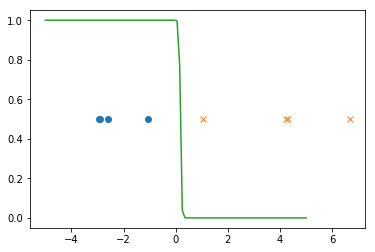

0.0


In [219]:
opt_theta = optimize_theta(x, y)
x_pred = np.linspace(-5, 5, 100)
y_pred_prob = prediction(x_pred, opt_theta)

plt.plot(class_0, len(class_0)*[0.5], "o")
plt.plot(class_1, len(class_1)*[0.5], "x")
plt.plot(x_pred, y_pred_prob)
#plt.fill(y)
plt.show()

y_pred = prediction(x, opt_theta)
print(error_rate(prob_to_label(y_pred), y))

c:\users\kzorina\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


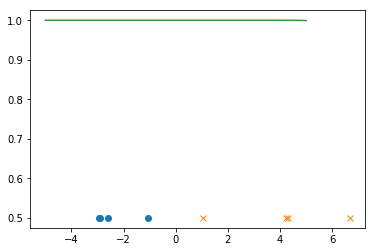

0.5


In [220]:
opt_eta = optimize_eta(x, y)
x_pred = np.linspace(-5, 5, 100)
y_pred_prob = expected_prediction(x_pred, opt_eta)

plt.plot(class_0, len(class_0)*[0.5], "o")
plt.plot(class_1, len(class_1)*[0.5], "x")
plt.plot(x_pred, y_pred_prob)
#plt.fill(y)
plt.show()

y_pred = expected_prediction(x, opt_eta)
print(error_rate(prob_to_label(y_pred), y))

In [223]:
rounds = 100
N = 8
N_test = 1000

method1_errors = []
method2_errors = []
for trial in range(rounds):
    
    x, y, class_0, class_1 = create_dataset(N)
    try:
        opt_theta = optimize_theta(x, y)
    except:
        print("Failed to opt theta ^()")
    opt_eta = optimize_eta(x, y)
    
    x_test, y_test, class_0, class_1 = create_dataset(N_test)
    
    y_pred_method1 = prediction(x_test, opt_theta)
    y_pred_method2 = expected_prediction(x_test, opt_eta)
    
    method1_errors.append(error_rate(prob_to_label(y_pred_method1), y_test))
    method2_errors.append(error_rate(prob_to_label(y_pred_method2), y_test))

Failed to opt theta ^()


c:\users\kzorina\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Failed to opt theta ^()
Failed to opt theta ^()


OverflowError: math range error